# Logistic Regression

## 1. Logistic Regression

[numpy.loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy-loadtxt)

[numpy.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html#numpy-transpose)

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [2]:
x1, x2, y = numpy.loadtxt('ex2data1.txt',delimiter=',',unpack=True)
x = numpy.transpose(numpy.array([x1,x2]))
y = numpy.transpose(numpy.array([y]))

### Plot the data

In [3]:
admitted = []
unadmitted = []
for i in range(y.size):
    if y[i] == 1:
        admitted.append(x[i])
    else:
        unadmitted.append(x[i])
admitted = numpy.array(admitted)
unadmitted = numpy.array(unadmitted)

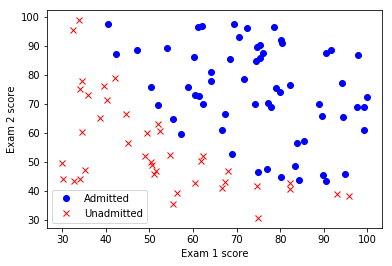

In [4]:
plt.figure()
plt.plot(admitted[:,0],admitted[:,1],'bo',label='Admitted')
plt.plot(unadmitted[:,0],unadmitted[:,1],'rx',label='Unadmitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

### Implement Logistic Regression

#### Sigmoid Function

[Sigmoid Function(Wikipedia)](https://en.wikipedia.org/wiki/Sigmoid_function)

In [5]:
def sigmoid_function(x): 
    return 1/(1 + numpy.exp(-x))

#### Plot Sigmoid Function

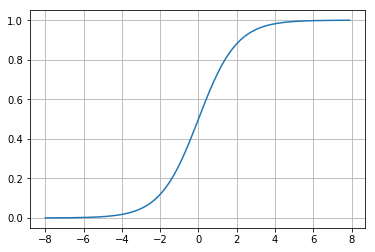

In [6]:
xxx = numpy.arange(-8,8,0.1)
plt.plot(xxx,sigmoid_function(xxx))
plt.grid()

#### Implementation

[numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy-dot)
 
[numpy.ndarrey.T](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html#numpy-ndarray-t)

[numpy.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html#numpy-sum)

In [7]:
def hypothesisFunc(X, theta):
    return sigmoid_function(numpy.dot(X,theta))

In [8]:
def calCost(theta, X, y):
    t1 = numpy.dot(-y.T, numpy.log(hypothesisFunc(X, theta)))
    t2 = numpy.dot((1-y).T, numpy.log(1-hypothesisFunc(X, theta)))
    m = y.size
    return float((t1-t2)/m)

In [9]:
theta_init = numpy.array([[0],[0],[0]])
X = numpy.insert(x, 0, 1, axis=1)

calCost(theta_init, X, y)

0.6931471805599452

In [10]:
alpha = 0.01

In [11]:
def nextTheta(thisTheta, X, y):
    m = y.size
    nextThetaList = []
    for j in range(thisTheta.size):
        nextThetaList.append(float(thisTheta[j])-alpha/m*float(numpy.dot((hypothesisFunc(X, thisTheta) - y).T, X[:,j])))
    return numpy.array([nextThetaList]).T

In [12]:
def gradDescent(iteration, initTheta, X, y):
    thisTheta = initTheta
    for i in range(iteration):
        thisTheta = nextTheta(thisTheta, X, y)
    return thisTheta

In [13]:
final_theta = gradDescent(200000, theta_init, X, y)
calCost(final_theta, X, y)

0.30682849002842216

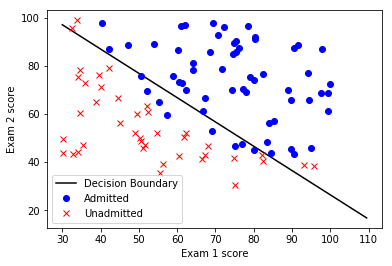

In [14]:
# x2 = (-1/thetheta2)(theta0 + theta1*x1)
boundary_x1 = numpy.arange(30, 110, 0.5)
boundary_y = (-1/final_theta[2])*(final_theta[0] + final_theta[1]*boundary_x1)
plt.figure()
plt.plot(boundary_x1, boundary_y, 'k-', label="Decision Boundary")
plt.plot(admitted[:,0],admitted[:,1],'bo',label='Admitted')
plt.plot(unadmitted[:,0],unadmitted[:,1],'rx',label='Unadmitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

#### Prediction

In [15]:
prediction = hypothesisFunc(X, final_theta) > 0.5
ori = (y == 1)

predict_correct = (prediction == ori)

# fraction of correctly predicted samples in training set
numpy.sum(predict_correct)/y.size

0.88

## 2. Regularized Logistic Regression

In [56]:
xx1, xx2, yy = numpy.loadtxt('ex2data2.txt',delimiter=',',unpack=True)
xx = numpy.transpose(numpy.array([xx1,xx2]))
yy = numpy.transpose(numpy.array([yy]))

### Plot the data

In [52]:
admitted = []
unadmitted = []
for i in range(yy.size):
    if yy[i] == 1:
        admitted.append(xx[i])
    else:
        unadmitted.append(xx[i])
admitted = numpy.array(admitted)
unadmitted = numpy.array(unadmitted)

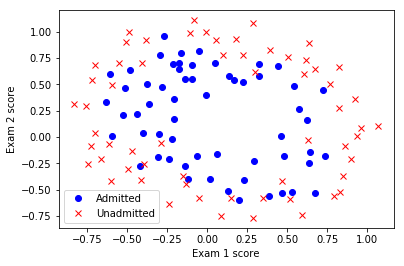

In [53]:
plt.figure()
plt.plot(admitted[:,0],admitted[:,1],'bo',label='Admitted')
plt.plot(unadmitted[:,0],unadmitted[:,1],'rx',label='Unadmitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

### Feature Map

In [37]:
xxx = []
for e in range(yy.size):
    xxx_temp = []
    for i in range(7):
        for j in range(7-i):
            xxx_temp.append(numpy.power(xx1[e],i) * numpy.power(xx2[e],j))
    xxx.append(xxx_temp)
    
xxx = numpy.array(xxx)

### Implement Regularized Logistic Regression

In [45]:
def calCostReg(theta, X, y, lambdaa):
    return calCost(theta, X, y) - float((lambdaa/2) * numpy.dot(theta[1:].T, theta[1:]))

In [57]:
xx = numpy.insert(xx, 0, 1, axis=1)
calCostReg(theta_init, xx, yy, 0)

0.6931471805599453

In [60]:
def nextThetaReg(thisTheta, X, y, lambdaa):
    m = y.size
    nextThetaList = []
    for j in range(thisTheta.size):
        if j == 0:
            nextThetaList.append(float(thisTheta[j])-1/m*float(numpy.dot((hypothesisFunc(X, thisTheta) - y).T, X[:,j])))
        else:
            nextThetaList.append(float(thisTheta[j])-1/m*float(numpy.dot((hypothesisFunc(X, thisTheta) - y).T, X[:,j])) + lambdaa/m*thisTheta[j])
    return numpy.array([nextThetaList]).T

In [63]:
initial_theta = numpy.zeros((xxx.shape[1],1))